# Midterm code starter
In this notebook, we will pull features out of the Kaggle version of the titanic data set.  We separate by sex and do a sample plot.

You can modify the plot as you see fit.

## Pull in the data
Read the train.csv data set into `dft` and then display the first 10 instances

Later code is expecting to find the data frame in the variable dft, so make sure that is what you use throughout.


### Get basic information on the features
Use hist() to look at the distribution of the features

In [59]:
# Question 1A code  [Answer]
import pathlib, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

dfo = pd.read_csv('titanic.csv')
dft = pd.read_csv('train.csv')

dft.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


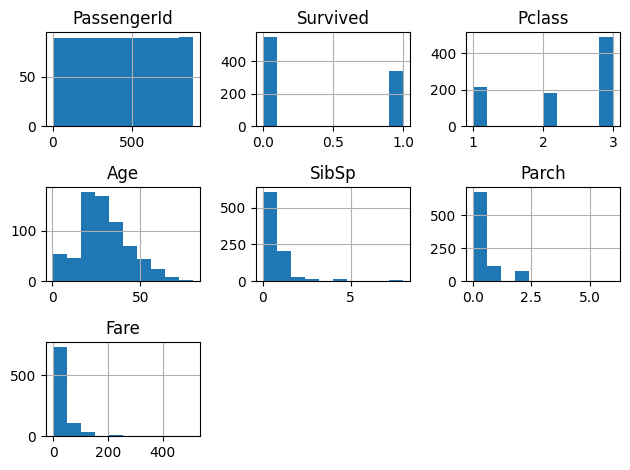

In [60]:
dft.hist()
plt.tight_layout()

In [61]:
dft.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Fix missing values for age
Replace missing values for age with the average (mean).  Do the operation in place.

In [4]:
dft_age_fill = dft['Age'].mean()
dft['Age'].fillna(dft_age_fill, inplace = True)
dft.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# check that cleaning is good (You don't need to add anything here, but you may)
dft.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


### Decision Tree classifier

I chose the features for you!

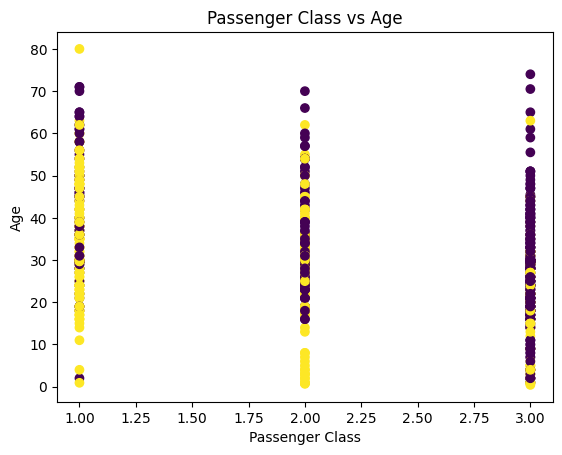

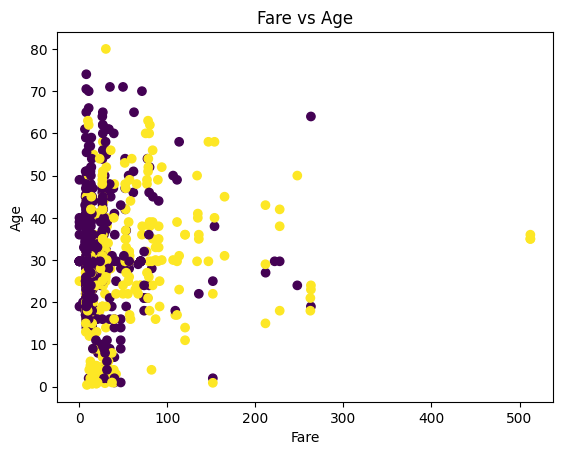

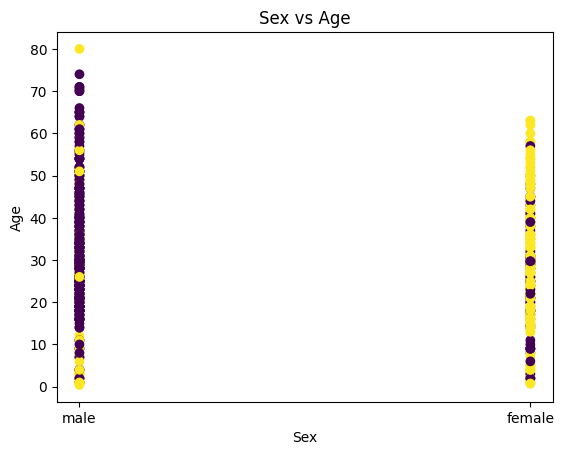

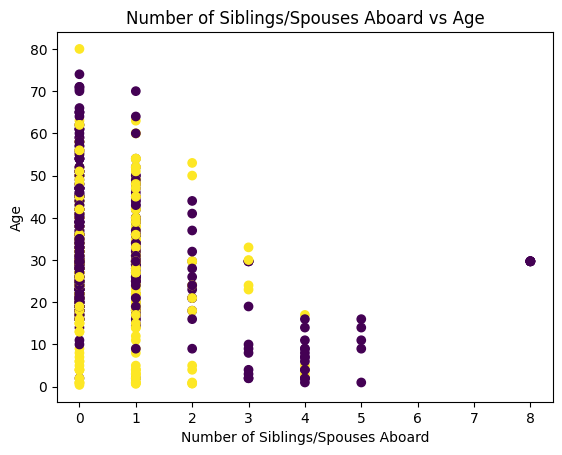

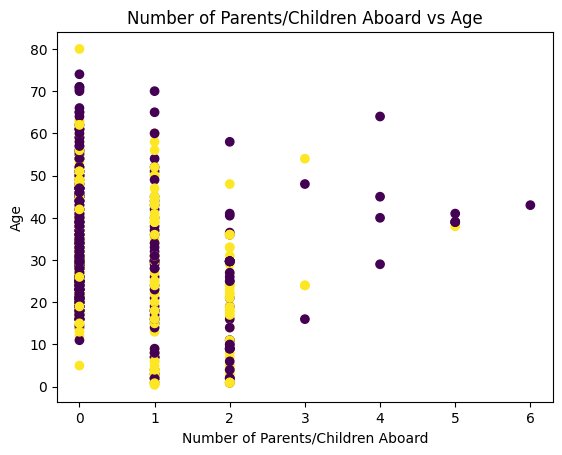

In [6]:
pclass = dft['Pclass']
sex = dft['Sex']
age = dft['Age']
sibsp = dft['SibSp']
parch = dft['Parch']
fare = dft['Fare']
survived = dft['Survived']

plt.scatter(pclass, age, c=survived)
plt.title('Passenger Class vs Age')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

plt.scatter(fare, age, c=survived)
plt.title('Fare vs Age')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

plt.scatter(sex, age, c=survived)
plt.title('Sex vs Age')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

plt.scatter(sibsp, age, c=survived)
plt.title('Number of Siblings/Spouses Aboard vs Age')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Age')
plt.show()

plt.scatter(parch, age, c=survived)
plt.title('Number of Parents/Children Aboard vs Age')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Age')
plt.show()



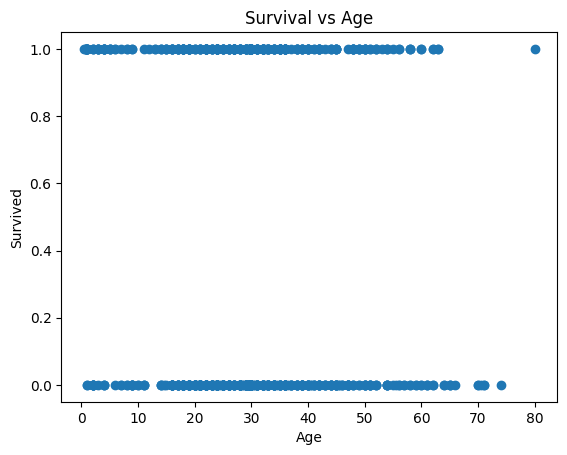

In [7]:
plt.scatter(age, survived)
plt.title('Survival vs Age')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

Build and train a decision tree classifier
Print the confusion matrix and scores for the trained model

Use the variable y_predicted to determine the performance of the model.  The graphing code below needs to have it defined in order to work correctly.

In [54]:
# Question 3e, 3f, 3g code  [Answer]
x = dft[['Age', 'Fare']]
y = dft['Survived']

tree_model = DecisionTreeClassifier()
tree_model.fit(x,y)

y_predicted = tree_model.predict(x)
print("Confusion Matrix Results:")
print(confusion_matrix(y, y_predicted))

fmt = '{:<12} {:}'
print()
print(fmt.format('Accuracy:', round(accuracy_score(y, y_predicted),2)))
print(fmt.format('Precision:', round(precision_score(y, y_predicted),2)))
print(fmt.format('Recall:', round(recall_score(y, y_predicted),2)))
print(fmt.format('F1:', round(f1_score(y, y_predicted),2)))

Confusion Matrix Results:
[[543   6]
 [ 39 303]]

Accuracy:    0.95
Precision:   0.98
Recall:      0.89
F1:          0.93


### Graph for age vs survival, male/female splits

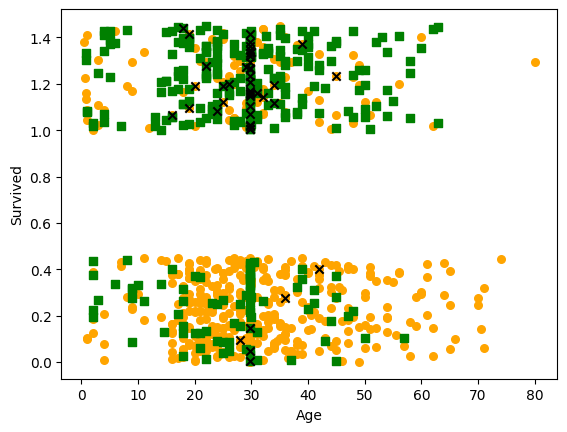

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Differentiate on sex
male = (dft["Sex"] == "male")
female = (dft["Sex"] == "female")


# Get prediction status from the model
correct = (y - y_predicted) == 0   # true/false if a match
correctM = correct[male]
correctF = correct[female]

#Pull out the features for plotting

# Continuous features, so just use directly
ageM = dft[male]["Age"]
ageF = dft[female]["Age"]

fareM =dft[male]["Fare"]
fareF =dft[female]["Fare"]

numberMales = len(ageM)
numberFemales = len(ageF)

# Discrete categoies, so smear the values out by a random amount
smear = 0.45

pclassM = dft[male]["Pclass"]
pclassM += np.random.random(numberMales)*smear
pclassF = dft[female]["Pclass"]
pclassF += np.random.random(numberFemales)*smear

survivedM = dft[male]["Survived"]
survivedM += np.random.random(numberMales)*smear
survivedft = dft[female]["Survived"] 
survivedft += np.random.random(numberFemales)*smear

sibspM = dft[male]["SibSp"]
sibspM += np.random.random(numberMales)*smear
sibspF = dft[female]["SibSp"] 
sibspF += np.random.random(numberFemales)*smear

parchM = dft[male]["Parch"]
parchM += np.random.random(numberMales)*smear
parchF = dft[female]["Parch"] 
parchF += np.random.random(numberFemales)*smear

# Do the plot of age vs survival
plt.xlabel("Age")
plt.ylabel("Survived")

# Scatter plot Male then Female.  (Can reorder if wanted.)
plt.scatter(x=ageM, y=survivedM, marker="o", c="orange", s=30) 
plt.scatter(x=ageF, y=survivedft, marker="s", c="green", s=30) 

#Just mark the ones that are incorrect with X's
#Can comment these two lines out, not critical for the midterm 
plt.scatter(x=ageM[~correctM], y=survivedM[~correctM], marker="x", c="black") 
plt.scatter(x=ageF[~correctF], y=survivedft[~correctF], marker="x", c="black") 

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Differentiate on sex
male = (dft["Sex"] == "male")
female = (dft["Sex"] == "female")


# Get prediction status from the model
correct = (y - y_predicted) == 0   # true/false if a match
correctM = correct[male]
correctF = correct[female]

#Pull out the features for plotting

# Continuous features, so just use directly
ageM = dft[male]["Age"]
ageF = dft[female]["Age"]

fareM =dft[male]["Fare"]
fareF =dft[female]["Fare"]

numberMales = len(ageM)
numberFemales = len(ageF)

# Discrete categoies, so smear the values out by a random amount
smear = 0.45

pclassM = dft[male]["Pclass"]
pclassM += np.random.random(numberMales)*smear
pclassF = dft[female]["Pclass"]
pclassF += np.random.random(numberFemales)*smear

survivedM = dft[male]["Survived"]
survivedM += np.random.random(numberMales)*smear
survivedft = dft[female]["Survived"] 
survivedft += np.random.random(numberFemales)*smear

sibspM = dft[male]["SibSp"]
sibspM += np.random.random(numberMales)*smear
sibspF = dft[female]["SibSp"] 
sibspF += np.random.random(numberFemales)*smear

parchM = dft[male]["Parch"]
parchM += np.random.random(numberMales)*smear
parchF = dft[female]["Parch"] 
parchF += np.random.random(numberFemales)*smear

# Do the plot of age vs survival
plt.xlabel("Age")
plt.ylabel("Survived")

# Scatter plot Male then Female.  (Can reorder if wanted.)
plt.scatter(x=ageM, y=survivedM, marker="o", c="orange", s=30) 
plt.scatter(x=ageF, y=survivedft, marker="s", c="green", s=30) 

#Just mark the ones that are incorrect with X's
#Can comment these two lines out, not critical for the midterm 
plt.scatter(x=ageM[~correctM], y=survivedM[~correctM], marker="x", c="black") 
plt.scatter(x=ageF[~correctF], y=survivedft[~correctF], marker="x", c="black") 

plt.show()
